In [1]:
pip install plotly
pip install keras
pip install Tokenizer
pip install pad_sequences
pip install Sequential
pip install layers
pip install callbacks
pip install tensorflow
pip install preprocessing
pip install sequence
pip install pad_sequences

SyntaxError: invalid syntax (3120414428.py, line 1)

In [ ]:
#pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import string, re
import itertools
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import pad_sequences as ps
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
py.init_notebook_mode(connected=True)
%matplotlib inline


2023-01-08 16:25:43.583940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Reading the .csv file and fetching the necessary columns. 
df = pd.read_csv("/Users/chandanimanavadaria/Downloads/hotel_data.csv")
data=df[['name','reviews.text','reviews.rating', 'reviews.date']]



In [4]:
#EDA

In [3]:
data['sentiment']=data['reviews.rating'].apply(lambda x:0 if x<=3 else 1)
data

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1194/2783822376.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name  \
0          Best Western Plus South Coast Inn   
1     Best Western Carmel's Town House Lodge   
2     Best Western Carmel's Town House Lodge   
3     Best Western Carmel's Town House Lodge   
4     Best Western Carmel's Town House Lodge   
...                                      ...   
9995        Hampton Inn Hampton-newport News   
9996        Hampton Inn Hampton-newport News   
9997        Hampton Inn Hampton-newport News   
9998                         Roseberry's Inn   
9999               Hampton Inn-lindale/tyler   

                                           reviews.text  reviews.rating  \
0     This hotel was nice and quiet. Did not know, t...               3   
1     We stayed in the king suite with the separatio...               4   
2     Parking was horrible, somebody ran into my ren...               3   
3     Not cheap but excellent location. Price is som...               5   
4     If you get the room that they advertised on th...               2   
...                                                 ...             ...   
9995  My friends and I took a trip to Hampton for th...               4   
9996  from check in to departure, staff is friendly,...               5   
9997  This Hampton is located on a quiet street acro...               5   
9998  Awesome wings (my favorite was garlic parmesan...               5   
9999  Clean facility just off freeway ..... staff fr...               4   

                  reviews.date  sentiment  
0     2018-01-01T00:00:00.000Z          0  
1         2016-04-02T00:00:00Z          1  
2         2016-01-06T00:00:00Z          0  
3         2016-08-22T00:00:00Z          1  
4         2016-03-21T00:00:00Z          0  
...                        ...        ...  
9995      2015-12-24T00:00:00Z          1  
9996      2015-11-17T00:00:00Z          1  
9997      2016-07-06T00:00:00Z          1  
9998  2016-10-26T00:00:00.000Z          1  
9999  2017-06-29T00:00:00.000Z          1  

[10000 rows x 5 columns]

In [6]:
data_length = data['reviews.text'].str.len()
print('Mean:', data_length.mean())
print ('Standard Deviation:', data_length.std())
print ('Min:', data_length.min())
print ('Max:', data_length.max())

Mean: 651.8996
Standard Deviation: 593.5594179171115
Min: 8
Max: 14254


In [7]:
data_length.describe()

count    10000.000000
mean       651.899600
std        593.559418
min          8.000000
25%        302.000000
50%        462.000000
75%        812.250000
max      14254.000000
Name: reviews.text, dtype: float64

In [8]:
data.histo = [go.Histogram(x=data_length, xbins=dict(start=0, end=8000, size=50), marker=dict(color='#8c42f4'))]
layout = go.Layout(
                  title='Length of reviews distribution',                  
                  xaxis=dict(title='Length'),
                  yaxis=dict(title='Count'),
                  bargap=0.1)
fig = go.Figure(data=data.histo, layout=layout)
py.iplot(fig, filename='length histogram')

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1049/2156041053.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [9]:
data['review.length'] = data['reviews.text'].apply(lambda x: len(x))
data.plot = data.sort_values(by='review.length')
plot = go.Scatter(x = data.plot['review.length'], y = data.plot['sentiment'], mode='markers')
lyt = go.Layout(title="Review Length vs. Sentiment Label", xaxis=dict(title='Review Length'),yaxis=dict(title='Sentimento'))
fig = go.Figure(data=[plot], layout=lyt)
py.iplot(fig)



/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1049/2845864363.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



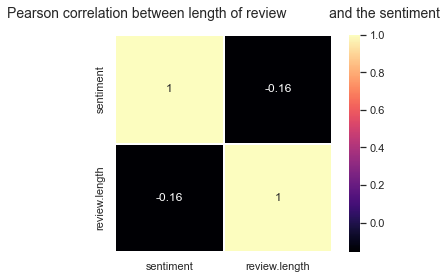

In [10]:
colormap = plt.cm.magma
plt.title('Pearson correlation between length of review\
           and the sentiment', y=1.05, size=14)
sns.heatmap(data.plot.drop(['reviews.text','name','reviews.rating', 'reviews.date'], axis=1).astype(float).corr(),
            linewidths=0.01,
            vmax=1.0,
            square=True,
            cmap=colormap,
            linecolor='white',
            annot=True)
plt.show()

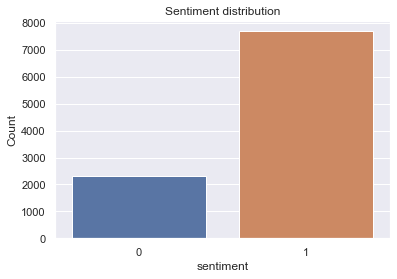

In [11]:
sns.set(style="darkgrid")
b = sns.countplot(x='sentiment',
                  data = data)
b.axes.set_title('Sentiment distribution')
b.set_xlabel("sentiment")
b.set_ylabel("Count")
plt.show()

In [12]:
#data_preprocessing

In [4]:
from nltk.corpus import wordnet
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [5]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    stop.remove('not')
    stop.append('hotel')
    text = [x for x in text if x not in stop]
    #remove empty tokens
    text = [t for t in text if len(t) > 0]
    #pos tag text
    pos_tag_text = pos_tag(text)
    # lemmatize text
    # the 'post_tag'function will return turples with the first word t[0] is the orginal word, and the second t[1] is the speech tag
    # for example, ('fly', 'NN')
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tag_text]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

    

In [6]:
    # clean text data
data['clean.review'] = data["reviews.text"].apply(lambda x:  clean_text(x))

    

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1194/68341020.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
data[['name','reviews.text','clean.review']]

name  \
0          Best Western Plus South Coast Inn   
1     Best Western Carmel's Town House Lodge   
2     Best Western Carmel's Town House Lodge   
3     Best Western Carmel's Town House Lodge   
4     Best Western Carmel's Town House Lodge   
...                                      ...   
9995        Hampton Inn Hampton-newport News   
9996        Hampton Inn Hampton-newport News   
9997        Hampton Inn Hampton-newport News   
9998                         Roseberry's Inn   
9999               Hampton Inn-lindale/tyler   

                                           reviews.text  \
0     This hotel was nice and quiet. Did not know, t...   
1     We stayed in the king suite with the separatio...   
2     Parking was horrible, somebody ran into my ren...   
3     Not cheap but excellent location. Price is som...   
4     If you get the room that they advertised on th...   
...                                                 ...   
9995  My friends and I took a trip to Hampton for th...   
9996  from check in to departure, staff is friendly,...   
9997  This Hampton is located on a quiet street acro...   
9998  Awesome wings (my favorite was garlic parmesan...   
9999  Clean facility just off freeway ..... staff fr...   

                                           clean.review  
0     nice quiet not know train track near train pas...  
1     stay king suite separation bedroom live space ...  
2     park horrible somebody run rental car stay get...  
3     not cheap excellent location price somewhat st...  
4     get room advertised website pay may lucky.if s...  
...                                                 ...  
9995  friend take trip hampton basslights show book ...  
9996  check departure staff friendly professional wa...  
9997  hampton locate quiet street across hospital lo...  
9998  awesome wing favorite garlic parmesan great at...  
9999  clean facility freeway staff friendly efficien...  

[10000 rows x 3 columns]

In [17]:
#word_cloud

In [8]:
# Add sentiment analysis columns (neg,neu,pos,compond)

vader_sen = SentimentIntensityAnalyzer()
data_vader = data 
data_vader["sentiments"] = data['clean.review'].apply(lambda x: vader_sen.polarity_scores(x))
data_vader = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)
data_vader[['clean.review','pos', 'neg', 'neu', 'compound']]

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1194/3798080276.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



clean.review    pos    neg    neu  \
0     nice quiet not know train track near train pas...  0.318  0.000  0.682   
1     stay king suite separation bedroom live space ...  0.282  0.110  0.608   
2     park horrible somebody run rental car stay get...  0.111  0.122  0.767   
3     not cheap excellent location price somewhat st...  0.263  0.147  0.590   
4     get room advertised website pay may lucky.if s...  0.000  0.303  0.697   
...                                                 ...    ...    ...    ...   
9995  friend take trip hampton basslights show book ...  0.122  0.000  0.878   
9996  check departure staff friendly professional wa...  0.548  0.000  0.452   
9997  hampton locate quiet street across hospital lo...  0.185  0.067  0.747   
9998  awesome wing favorite garlic parmesan great at...  0.474  0.070  0.456   
9999  clean facility freeway staff friendly efficien...  0.474  0.000  0.526   

      compound  
0       0.7906  
1       0.7351  
2      -0.0772  
3       0.5725  
4      -0.8089  
...        ...  
9995    0.4939  
9996    0.9545  
9997    0.6049  
9998    0.9359  
9999    0.9231  

[10000 rows x 5 columns]

In [9]:
#VADER SENTIMENT

def get_vader(sen): 
    compound=SentimentIntensityAnalyzer().polarity_scores(sen)['compound']
    if compound > 0.05: 
        return 1
    else: 
        return 0
data['vader']=data.apply(lambda x: get_vader(x['clean.review']), axis=1)

print(classification_report(data["sentiment"].values, data["vader"].values))



              precision    recall  f1-score   support

           0       0.79      0.23      0.36      2311
           1       0.81      0.98      0.89      7689

    accuracy                           0.81     10000
   macro avg       0.80      0.61      0.62     10000
weighted avg       0.81      0.81      0.76     10000



/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1194/3045181085.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
pos_review = data[data['vader']==1]
neg_review = data[data['vader']==0]

def word__cloud(text,title):
    wordcloud = WordCloud(
                    background_color ='white', 
                    max_words = 200,
                    min_font_size = 10,
                    min_word_length = 3).generate(str(text))

    plt.figure(figsize = (10,10)) 
    plt.title(title,fontsize =30, pad = 30)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()



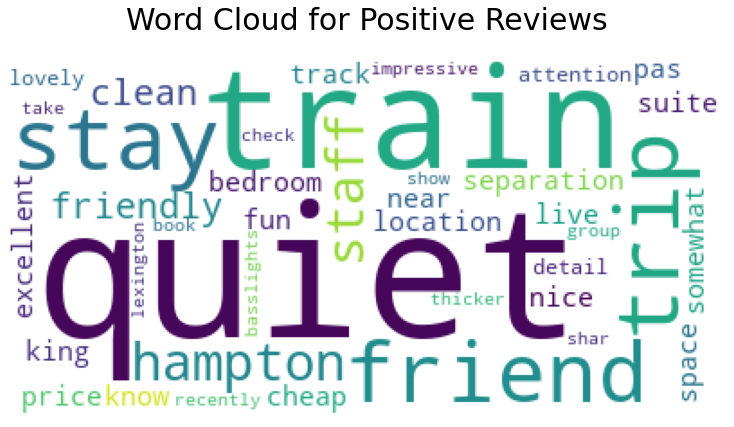

In [11]:
word__cloud(pos_review['clean.review'],'Word Cloud for Positive Reviews')

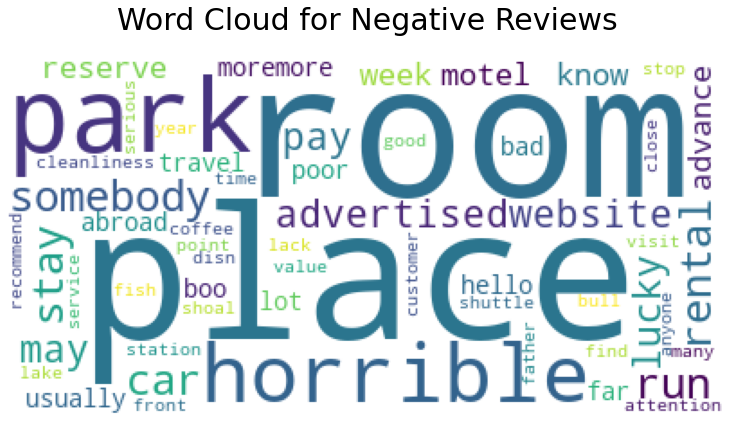

In [12]:
word__cloud(neg_review['clean.review'],'Word Cloud for Negative Reviews')

In [13]:
data[['name','clean.review','sentiment','vader']]

name  \
0          Best Western Plus South Coast Inn   
1     Best Western Carmel's Town House Lodge   
2     Best Western Carmel's Town House Lodge   
3     Best Western Carmel's Town House Lodge   
4     Best Western Carmel's Town House Lodge   
...                                      ...   
9995        Hampton Inn Hampton-newport News   
9996        Hampton Inn Hampton-newport News   
9997        Hampton Inn Hampton-newport News   
9998                         Roseberry's Inn   
9999               Hampton Inn-lindale/tyler   

                                           clean.review  sentiment  vader  
0     nice quiet not know train track near train pas...          0      1  
1     stay king suite separation bedroom live space ...          1      1  
2     park horrible somebody run rental car stay get...          0      0  
3     not cheap excellent location price somewhat st...          1      1  
4     get room advertised website pay may lucky.if s...          0      0  
...                                                 ...        ...    ...  
9995  friend take trip hampton basslights show book ...          1      1  
9996  check departure staff friendly professional wa...          1      1  
9997  hampton locate quiet street across hospital lo...          1      1  
9998  awesome wing favorite garlic parmesan great at...          1      1  
9999  clean facility freeway staff friendly efficien...          1      1  

[10000 rows x 4 columns]

In [14]:
#tfidf

In [15]:
X = data['clean.review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
vectorizer = TfidfVectorizer(min_df=40)
train_tfidf = vectorizer.fit_transform(X_train)
test_tfidf = vectorizer.transform(X_test)

In [17]:
vectorizer.get_feature_names_out(20)


array(['able', 'absolutely', 'ac', ..., 'your', 'yours', 'zoo'],
      dtype=object)

In [18]:
#RandomForestClassifier

In [19]:
# Train randomforest model
rf = RandomForestClassifier(n_estimators = 30, random_state = 42)
rf.fit(train_tfidf, y_train)

pred_train_rf=rf.predict(train_tfidf)
pred_test_rf= rf.predict(test_tfidf)



In [20]:
print('Train accuracy:', accuracy_score(y_train, pred_train_rf))
print('Test accuracy', accuracy_score(y_test, pred_test_rf))


Train accuracy: 0.99875
Test accuracy 0.869


In [21]:
print(classification_report(y_train, pred_train_rf))
print(classification_report(y_test, pred_test_rf))
  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1843
           1       1.00      1.00      1.00      6157

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.87      0.52      0.65       468
           1       0.87      0.98      0.92      1532

    accuracy                           0.87      2000
   macro avg       0.87      0.75      0.78      2000
weighted avg       0.87      0.87      0.86      2000



In [22]:
#confusion matrix

In [23]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1840    3]
 [   7 6150]]
Confusion matrix, without normalization
[[ 243  225]
 [  37 1495]]


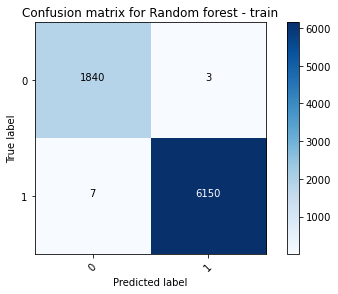

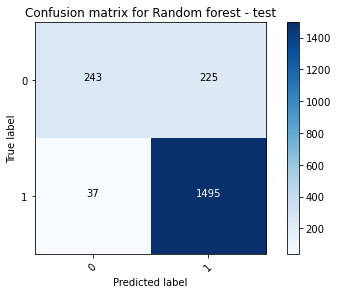

In [24]:
cnf_mat_train_rf = confusion_matrix(y_train, pred_train_rf)
cnf_mat_test_rf = confusion_matrix(y_test, pred_test_rf)

plt.figure()
plot_confusion_matrix(cnf_mat_train_rf,
                      classes=[0,1],
                      title='Confusion matrix for Random forest - train')
plt.figure()
plot_confusion_matrix(cnf_mat_test_rf,
                      classes=[0,1],
                      title='Confusion matrix for Random forest - test')

In [25]:
#SVM Model, kernel=linear
# Training a SVM model
svm_model = svm.SVC(kernel='linear', random_state = 42)
svm_model.fit(train_tfidf, y_train)
pred_train_svm = svm_model.predict(train_tfidf)
pred_test_svm = svm_model.predict(test_tfidf)


In [26]:
print(classification_report(y_train, pred_train_svm))
print(classification_report(y_test, pred_test_svm))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1843
           1       0.93      0.98      0.95      6157

    accuracy                           0.93      8000
   macro avg       0.92      0.87      0.89      8000
weighted avg       0.93      0.93      0.92      8000

              precision    recall  f1-score   support

           0       0.84      0.64      0.73       468
           1       0.90      0.96      0.93      1532

    accuracy                           0.89      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.89      0.89      0.88      2000



Confusion matrix, without normalization
[[1397  446]
 [ 141 6016]]
Confusion matrix, without normalization
[[ 301  167]
 [  56 1476]]


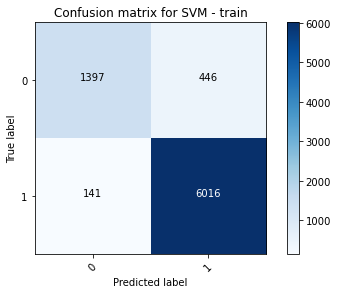

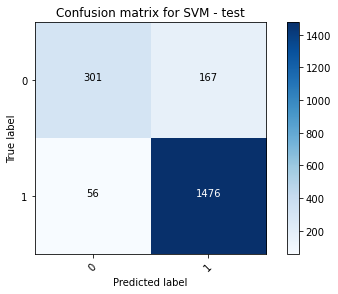

In [27]:
#Confusion Matrix for SVM
cnf_mat_train_svm = confusion_matrix(y_train, pred_train_svm)
cnf_mat_test_svm = confusion_matrix(y_test, pred_test_svm)

plt.figure()
plot_confusion_matrix(cnf_mat_train_svm,
                      classes=[0,1],
                      title='Confusion matrix for SVM - train')
plt.figure()
plot_confusion_matrix(cnf_mat_test_svm,
                      classes=[0,1],
                      title='Confusion matrix for SVM - test')

In [37]:
#Naive Bayes

In [29]:
#train NB model
model_nb = MultinomialNB()
model_nb.fit(train_tfidf, y_train)
pred_train_nb = model_nb.predict(train_tfidf)
pred_test_nb = model_nb.predict(test_tfidf)
print('Train Accuracy:', accuracy_score(y_train, pred_train_nb))
print('Test Accuracy:', accuracy_score(y_test, pred_test_nb))

Train Accuracy: 0.885125
Test Accuracy: 0.877


In [30]:
print(classification_report(y_train,pred_train_nb))  
print(classification_report(y_test,pred_test_nb))  

              precision    recall  f1-score   support

           0       0.89      0.57      0.70      1843
           1       0.88      0.98      0.93      6157

    accuracy                           0.89      8000
   macro avg       0.89      0.77      0.81      8000
weighted avg       0.89      0.89      0.88      8000

              precision    recall  f1-score   support

           0       0.89      0.54      0.67       468
           1       0.87      0.98      0.92      1532

    accuracy                           0.88      2000
   macro avg       0.88      0.76      0.80      2000
weighted avg       0.88      0.88      0.87      2000



Confusion matrix, without normalization
[[1050  793]
 [ 126 6031]]
Confusion matrix, without normalization
[[ 253  215]
 [  31 1501]]


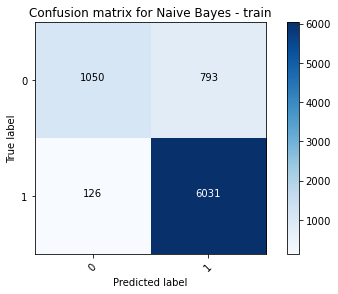

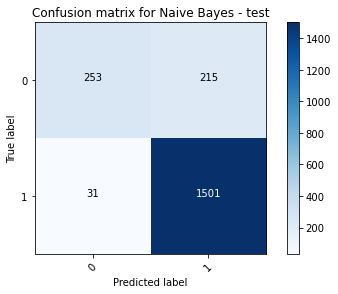

In [31]:
cnf_mat_train_nb = confusion_matrix(y_train, pred_train_nb)
cnf_mat_test_nb = confusion_matrix(y_test, pred_test_nb)
plt.figure()
plot_confusion_matrix(cnf_mat_train_nb,
                      classes=[0,1],
                      title='Confusion matrix for Naive Bayes - train')
plt.figure()
plot_confusion_matrix(cnf_mat_test_nb,
                      classes=[0,1],
                      title='Confusion matrix for Naive Bayes - test')

In [76]:
#LSTM
#setting the value as 2000 as the maximum length of the review is aproximately 2000 after cleaning

features = 1800
token_lstm = Tokenizer( num_words= features,split=' ')
token_lstm.fit_on_texts(data['clean.review'].values)
X = token_lstm.texts_to_sequences(data['clean.review'].values)
X = pad_sequences(X)
X

array([[   0,    0,    0, ...,  318,  229,    4],
       [   0,    0,    0, ...,  138,   25,   79],
       [   0,    0,    0, ...,  419, 1667,  440],
       ...,
       [   0,    0,    0, ...,    1,    6,   32],
       [   0,    0,    0, ...,  655,  471,   12],
       [   0,    0,    0, ...,  347,  241,   80]], dtype=int32)

In [77]:
X.shape

(10000, 1001)

In [78]:
embed_dim = 32 #This sets the size of the embedding layer in the model to 32

lstm_out = 16 #sets the size of the output from the LSTM layer to 16

model = Sequential() #creates a new Sequential model object in Keras

model.add(Embedding(features, embed_dim, input_length=X.shape[1])) #This adds an embedding layer to the model

model.add(LSTM(lstm_out)) #adds an LSTM layer to the model

model.add(Dense(1,activation='sigmoid')) #adds a dense (fully connected) layer to the model with 
                                        #a single output node and a sigmoid activation function

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #This compiles the model with a binary cross-entropy loss function, 
                                                                                #the Adam optimization algorithm, and accuracy as a metric. 
print(model.summary()) #Prints the summary of the model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1001, 32)          57600     
                                                                 
 lstm_4 (LSTM)               (None, 16)                3136      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 60,753
Trainable params: 60,753
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
Y = data['sentiment'].values


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20,random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8000, 1001) (8000,)
(2000, 1001) (2000,)


In [84]:
#Training a model
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
           )

Epoch 1/6
500/500 [==============================] - 132s 261ms/step - loss: 0.3866 - accuracy: 0.8366 - val_loss: 0.3554 - val_accuracy: 0.8420
Epoch 2/6
500/500 [==============================] - 125s 250ms/step - loss: 0.2622 - accuracy: 0.8978 - val_loss: 0.2912 - val_accuracy: 0.8865
Epoch 3/6
500/500 [==============================] - 127s 254ms/step - loss: 0.2231 - accuracy: 0.9175 - val_loss: 0.3027 - val_accuracy: 0.8885
Epoch 4/6
500/500 [==============================] - 130s 260ms/step - loss: 0.1997 - accuracy: 0.9251 - val_loss: 0.2972 - val_accuracy: 0.8850
Epoch 5/6
500/500 [==============================] - 135s 269ms/step - loss: 0.1764 - accuracy: 0.9360 - val_loss: 0.3247 - val_accuracy: 0.8855
Epoch 5: early stopping


In [68]:
#Fine tune experiment:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
           )

Epoch 1/6
500/500 [==============================] - 147s 290ms/step - loss: 0.3675 - accuracy: 0.8479 - val_loss: 0.2987 - val_accuracy: 0.8825
Epoch 2/6
500/500 [==============================] - 144s 289ms/step - loss: 0.2509 - accuracy: 0.9036 - val_loss: 0.2888 - val_accuracy: 0.8900
Epoch 3/6
500/500 [==============================] - 144s 288ms/step - loss: 0.2146 - accuracy: 0.9196 - val_loss: 0.2885 - val_accuracy: 0.8940
Epoch 4/6
500/500 [==============================] - 147s 295ms/step - loss: 0.1782 - accuracy: 0.9376 - val_loss: 0.3053 - val_accuracy: 0.8900
Epoch 5/6
500/500 [==============================] - 139s 277ms/step - loss: 0.1575 - accuracy: 0.9424 - val_loss: 0.3332 - val_accuracy: 0.8785
Epoch 5: early stopping


In [69]:
#Fine tune experiment:

batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 3,
          batch_size=batch_size,
          validation_data=(X_test, Y_test)
           )

Epoch 1/3
500/500 [==============================] - 148s 296ms/step - loss: 0.1354 - accuracy: 0.9526 - val_loss: 0.4353 - val_accuracy: 0.8800
Epoch 2/3
500/500 [==============================] - 140s 279ms/step - loss: 0.1198 - accuracy: 0.9592 - val_loss: 0.4340 - val_accuracy: 0.8755
Epoch 3/3
500/500 [==============================] - 141s 282ms/step - loss: 0.1003 - accuracy: 0.9653 - val_loss: 0.4719 - val_accuracy: 0.8710


In [74]:

batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
                  )

Epoch 1/6
500/500 [==============================] - 191s 377ms/step - loss: 0.3683 - accuracy: 0.8482 - val_loss: 0.2986 - val_accuracy: 0.8890
Epoch 2/6
500/500 [==============================] - 183s 366ms/step - loss: 0.2653 - accuracy: 0.8978 - val_loss: 0.2983 - val_accuracy: 0.8835
Epoch 3/6
500/500 [==============================] - 168s 335ms/step - loss: 0.2213 - accuracy: 0.9180 - val_loss: 0.3004 - val_accuracy: 0.8725
Epoch 3: early stopping


In [86]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
                  )

Epoch 1/6
500/500 [==============================] - 143s 281ms/step - loss: 0.3685 - accuracy: 0.8459 - val_loss: 0.3148 - val_accuracy: 0.8705
Epoch 2/6
500/500 [==============================] - 133s 266ms/step - loss: 0.2665 - accuracy: 0.8956 - val_loss: 0.2788 - val_accuracy: 0.8910
Epoch 3/6
500/500 [==============================] - 129s 258ms/step - loss: 0.2286 - accuracy: 0.9136 - val_loss: 0.2764 - val_accuracy: 0.8860
Epoch 4/6
500/500 [==============================] - 148s 295ms/step - loss: 0.2091 - accuracy: 0.9220 - val_loss: 0.3060 - val_accuracy: 0.8770
Epoch 4: early stopping


In [92]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
                  )

Epoch 1/6
500/500 [==============================] - 131s 257ms/step - loss: 0.3755 - accuracy: 0.8430 - val_loss: 0.2897 - val_accuracy: 0.8920
Epoch 2/6
500/500 [==============================] - 128s 255ms/step - loss: 0.2671 - accuracy: 0.8986 - val_loss: 0.2910 - val_accuracy: 0.8790
Epoch 3/6
500/500 [==============================] - 126s 253ms/step - loss: 0.2283 - accuracy: 0.9134 - val_loss: 0.2847 - val_accuracy: 0.8880
Epoch 3: early stopping


In [102]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
           )

Epoch 1/6
500/500 [==============================] - 122s 240ms/step - loss: 0.3870 - accuracy: 0.8361 - val_loss: 0.2948 - val_accuracy: 0.8870
Epoch 2/6
500/500 [==============================] - 122s 244ms/step - loss: 0.2680 - accuracy: 0.8979 - val_loss: 0.2916 - val_accuracy: 0.8865
Epoch 3/6
500/500 [==============================] - 117s 233ms/step - loss: 0.2322 - accuracy: 0.9116 - val_loss: 0.2934 - val_accuracy: 0.8810
Epoch 3: early stopping


In [116]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
           )

Epoch 1/6
500/500 [==============================] - 83s 162ms/step - loss: 0.3972 - accuracy: 0.8275 - val_loss: 0.3115 - val_accuracy: 0.8705
Epoch 2/6
500/500 [==============================] - 71s 142ms/step - loss: 0.3083 - accuracy: 0.8773 - val_loss: 0.3088 - val_accuracy: 0.8690
Epoch 3/6
500/500 [==============================] - 71s 141ms/step - loss: 0.2937 - accuracy: 0.8824 - val_loss: 0.3217 - val_accuracy: 0.8660
Epoch 3: early stopping


In [126]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
           )

Epoch 1/6
500/500 [==============================] - 102s 200ms/step - loss: 0.3807 - accuracy: 0.8393 - val_loss: 0.3028 - val_accuracy: 0.8775
Epoch 2/6
500/500 [==============================] - 102s 205ms/step - loss: 0.2789 - accuracy: 0.8914 - val_loss: 0.2946 - val_accuracy: 0.8865
Epoch 3/6
500/500 [==============================] - 112s 225ms/step - loss: 0.2559 - accuracy: 0.9018 - val_loss: 0.2835 - val_accuracy: 0.8935
Epoch 4/6
500/500 [==============================] - 102s 205ms/step - loss: 0.2342 - accuracy: 0.9122 - val_loss: 0.2938 - val_accuracy: 0.8890
Epoch 5/6
500/500 [==============================] - 105s 210ms/step - loss: 0.2184 - accuracy: 0.9151 - val_loss: 0.3044 - val_accuracy: 0.8900
Epoch 5: early stopping


In [135]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
           )

Epoch 1/6
500/500 [==============================] - 108s 211ms/step - loss: 0.3877 - accuracy: 0.8397 - val_loss: 0.2859 - val_accuracy: 0.8870
Epoch 2/6
500/500 [==============================] - 105s 209ms/step - loss: 0.2741 - accuracy: 0.8938 - val_loss: 0.2838 - val_accuracy: 0.8895
Epoch 3/6
500/500 [==============================] - 103s 206ms/step - loss: 0.2505 - accuracy: 0.9068 - val_loss: 0.2923 - val_accuracy: 0.8790
Epoch 4/6
500/500 [==============================] - 103s 207ms/step - loss: 0.2212 - accuracy: 0.9168 - val_loss: 0.3031 - val_accuracy: 0.8865
Epoch 4: early stopping


In [152]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 6,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          callbacks = [EarlyStopping(monitor='val_accuracy',
                       min_delta=0.001,
                       patience=2,
                       verbose=1)]
           )

Epoch 1/6
500/500 [==============================] - 109s 215ms/step - loss: 0.3741 - accuracy: 0.8431 - val_loss: 0.2971 - val_accuracy: 0.8815
Epoch 2/6
500/500 [==============================] - 101s 203ms/step - loss: 0.2735 - accuracy: 0.8934 - val_loss: 0.2844 - val_accuracy: 0.8950
Epoch 3/6
500/500 [==============================] - 101s 203ms/step - loss: 0.2404 - accuracy: 0.9096 - val_loss: 0.3061 - val_accuracy: 0.8820
Epoch 4/6
500/500 [==============================] - 101s 202ms/step - loss: 0.2200 - accuracy: 0.9150 - val_loss: 0.3049 - val_accuracy: 0.8830
Epoch 4: early stopping


In [162]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 2,
          batch_size=batch_size,
          validation_data=(X_test, Y_test)
          
           )

Epoch 1/2
500/500 [==============================] - 115s 226ms/step - loss: 0.3897 - accuracy: 0.8393 - val_loss: 0.3076 - val_accuracy: 0.8800
Epoch 2/2
500/500 [==============================] - 101s 202ms/step - loss: 0.2775 - accuracy: 0.8910 - val_loss: 0.2871 - val_accuracy: 0.8855


In [169]:
batch_size = 16
history= model.fit(X_train,
          Y_train,
          epochs = 3,
          batch_size=batch_size,
          validation_data=(X_test, Y_test)
          
           )

Epoch 1/3
500/500 [==============================] - 116s 226ms/step - loss: 0.3871 - accuracy: 0.8353 - val_loss: 0.3056 - val_accuracy: 0.8785
Epoch 2/3
500/500 [==============================] - 105s 211ms/step - loss: 0.2806 - accuracy: 0.8899 - val_loss: 0.2938 - val_accuracy: 0.8775
Epoch 3/3
500/500 [==============================] - 115s 230ms/step - loss: 0.2479 - accuracy: 0.9040 - val_loss: 0.2957 - val_accuracy: 0.8850


In [85]:
#predicting train and test data
#from sklearn.metrics import average_precision_score, precision_recall_curve
#from sklearn.utils.fixes import signature

predictions_nn_train = model.predict(X_train)
predictions_nn_test = model.predict(X_test)
for i in range(len(predictions_nn_train)):
    if predictions_nn_train[i][0] < 0.5:
        predictions_nn_train[i][0] = 0
    else:
        predictions_nn_train[i][0] = 1
        
for i in range(len(predictions_nn_test)):
    if predictions_nn_test[i][0] < 0.5:
        predictions_nn_test[i][0] = 0
    else:
        predictions_nn_test[i][0] = 1
        
#precision= precision(Y_test, predictions_nn_test)




63/63 [==============================] - 4s 60ms/step


In [86]:
 
print(classification_report(Y_train,predictions_nn_train))  
print(classification_report(Y_test,predictions_nn_test)) 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1845
           1       0.97      0.98      0.97      6155

    accuracy                           0.96      8000
   macro avg       0.95      0.93      0.94      8000
weighted avg       0.96      0.96      0.96      8000

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       466
           1       0.91      0.95      0.93      1534

    accuracy                           0.89      2000
   macro avg       0.85      0.81      0.83      2000
weighted avg       0.88      0.89      0.88      2000



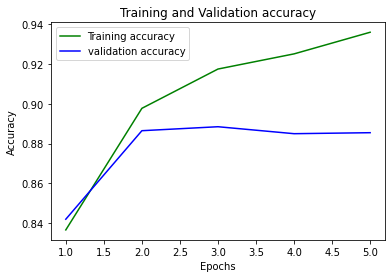

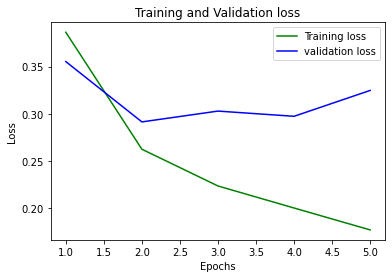

In [88]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Confusion matrix, without normalization
[[1635  210]
 [ 127 6028]]
Confusion matrix, without normalization
[[ 318  148]
 [  81 1453]]


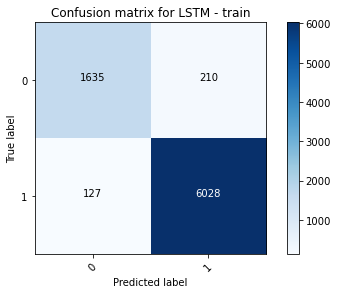

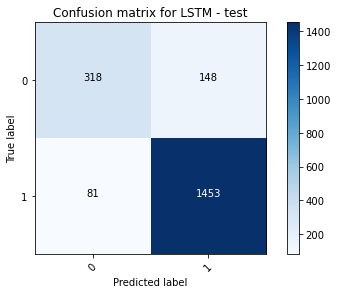

In [89]:
cnf_matrix_train = confusion_matrix(Y_train, predictions_nn_train)
cnf_matrix_test = confusion_matrix(Y_test, predictions_nn_test)
plt.figure()
plot_confusion_matrix(cnf_matrix_train,
                      classes=[0,1],
                      title='Confusion matrix for LSTM - train')
plt.figure()
plot_confusion_matrix(cnf_matrix_test,
                      classes=[0,1],
                      title='Confusion matrix for LSTM - test')


In [90]:
#predicting the hotel_review data

#tokenizing
token_lstm.fit_on_texts(data['clean.review'].values)
review_tok=token_lstm.texts_to_sequences(data['clean.review'].values)
review_pad=pad_sequences(review_tok)
data['pred'] = model.predict(review_pad)

#predictions
data['pred_ans']=data['pred'].apply(lambda x:0 if x<=0.5 else 1)
print('final accuracy', accuracy_score(data['sentiment'], data['pred_ans']))



313/313 [==============================] - 24s 76ms/step
final accuracy 0.9434


/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1194/1394486981.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1194/1394486981.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
data['pred_ans'].unique()

array([1, 0])

In [59]:
#fetching year out of the date 
data["date"] = pd.to_datetime(data["reviews.date"])
data['year'] = pd.DatetimeIndex(data['date']).year
data['year']

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1194/2038757071.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_1194/2038757071.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       2018
1       2016
2       2016
3       2016
4       2016
        ... 
9995    2015
9996    2015
9997    2016
9998    2016
9999    2017
Name: year, Length: 10000, dtype: int64

In [60]:
#analysis:1 Top hotels with highest rating each year
ana1 = data[['name','pred','year']].groupby(['year','name']).mean().reset_index() 
ana1['pred_ans']=ana1['pred'].apply(lambda x:0 if x<=0.5 else 1)
analysis1= ana1.groupby('year').head(1).sort_values(['year','pred'],ascending = False).reset_index(drop=True)
analysis1

year                                         name      pred  pred_ans
0   2019                  Best Western Plus Pavilions  0.993461         1
1   2018                       Aloft Atlanta Downtown  0.958535         1
2   2017                           402 Hotel #Thebigo  0.976336         1
3   2016                     11th Avenue Hotel Hostel  0.174990         0
4   2015                         Adobe Hacienda Motel  0.771566         1
5   2014                       Aloft Atlanta Downtown  0.675258         1
6   2013                   Aloft Philadelphia Airport  0.995638         1
7   2012                        Aloft Dallas Downtown  0.849715         1
8   2011                          Anaheim Del Sol Inn  0.460539         0
9   2010                          Anaheim Del Sol Inn  0.375363         0
10  2009  Best Western Lamplighter Inn Suites at SDSU  0.444561         0
11  2008             Best Western Cabrillo Garden Inn  0.508983         1
12  2007                          Anaheim Del Sol Inn  0.100849         0
13  2006                          Anaheim Del Sol Inn  0.112060         0
14  2005                      Best Western Seven Seas  0.278952         0
15  2004                          Anaheim Del Sol Inn  0.983777         1
16  2003                                  River Hotel  0.967273         1

In [61]:
#analysis:2 Top hotels with lowest rating each year
ana2 = data[['name','pred','year']].groupby(['year','name']).mean().reset_index() 
ana2['pred_ans']=ana2['pred'].apply(lambda x:0 if x<=0.5 else 1)
analysis2= ana2.groupby('year').head(1).sort_values(['year','pred'],ascending = True).reset_index(drop=True)
analysis2

year                                         name      pred  pred_ans
0   2003                                  River Hotel  0.967273         1
1   2004                          Anaheim Del Sol Inn  0.983777         1
2   2005                      Best Western Seven Seas  0.278952         0
3   2006                          Anaheim Del Sol Inn  0.112060         0
4   2007                          Anaheim Del Sol Inn  0.100849         0
5   2008             Best Western Cabrillo Garden Inn  0.508983         1
6   2009  Best Western Lamplighter Inn Suites at SDSU  0.444561         0
7   2010                          Anaheim Del Sol Inn  0.375363         0
8   2011                          Anaheim Del Sol Inn  0.460539         0
9   2012                        Aloft Dallas Downtown  0.849715         1
10  2013                   Aloft Philadelphia Airport  0.995638         1
11  2014                       Aloft Atlanta Downtown  0.675258         1
12  2015                         Adobe Hacienda Motel  0.771566         1
13  2016                     11th Avenue Hotel Hostel  0.174990         0
14  2017                           402 Hotel #Thebigo  0.976336         1
15  2018                       Aloft Atlanta Downtown  0.958535         1
16  2019                  Best Western Plus Pavilions  0.993461         1

In [62]:
#analysis:3 Overall Top 10 hotels with highest rating 
ana3 = data[['name','pred']].groupby(['name']).mean().sort_values('pred',ascending = False).head(10).reset_index() 
ana3['pred_ans']=ana3['pred'].apply(lambda x:0 if x<=0.5 else 1)

ana3

name      pred  pred_ans
0                  Hampton Inn Suites Red Bluff  0.997556         1
1                      Wyndham Garden Chinatown  0.996201         1
2                         Pacific Terrace Hotel  0.996053         1
3                          The Mercantile Hotel  0.995863         1
4                             The Herbert Hotel  0.995812         1
5                    The Parisian Courtyard Inn  0.995790         1
6            Staybridge Suites-colorado Springs  0.995663         1
7  Hampton Inn Suites Phenix City-Columbus Area  0.995615         1
8                            The Harkness Hotel  0.995232         1
9                     Best Western Lakewood Inn  0.994997         1

In [63]:
#analysis:4 Overall Top 10 hotels with lowest rating 
ana4 = data[['name','pred']].groupby(['name']).mean().sort_values('pred',ascending = True).head(10).reset_index() 
ana4['pred_ans']=ana4['pred'].apply(lambda x:0 if x<=0.5 else 1)
ana4


name      pred  pred_ans
0                            Best Western Logan Inn  0.033474         0
1                                  River Rock Hotel  0.041907         0
2                           Motel 6 Oakland Airport  0.042162         0
3                                  Ocean Park Hotel  0.042608         0
4                                   New Orleans Inn  0.045121         0
5                      Quality Inn & Suites Airport  0.045294         0
6                               Red Lion Inn Suites  0.046018         0
7     Americas Best Value Inn Suites-lexington Park  0.046267         0
8               Motel 6 Watsonville - Monterey Area  0.048477         0
9  Quality Inn Suites Oceanside Near Camp Pendleton  0.048492         0

In [64]:
#analysis:5 Overall hotel rating
ana5 = data[['name','pred',]].groupby(['name']).mean().reset_index() 
#hotelwise[hotelwise['name'] == 'EVEN Hotel Brooklyn']
ana5['pred_ans']=ana5['pred'].apply(lambda x:0 if x<=0.5 else 1)
ana5[ana5['name'] == 'Anaheim Del Sol Inn']
             

name      pred  pred_ans
39  Anaheim Del Sol Inn  0.731889         1

In [65]:
data.name.unique()

array(['Best Western Plus South Coast Inn',
       "Best Western Carmel's Town House Lodge",
       '21c Museum Hotel Lexington', ...,
       'Hampton Inn Hampton-newport News', "Roseberry's Inn",
       'Hampton Inn-lindale/tyler'], dtype=object)

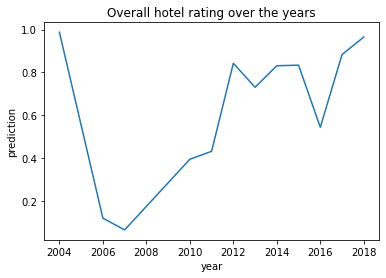

In [91]:
#analysis:6 Overall hotel rating over the years
hotel_year = data[['name','pred','year']].groupby(['year','name']).mean().sort_values(['year','pred']).reset_index() 
hotel_year1= hotel_year[hotel_year['name'] == "Anaheim Del Sol Inn"]
plt.plot(hotel_year1['year'], hotel_year1['pred'])

plt.title('Overall hotel rating over the years')
plt.ylabel('prediction')
plt.xlabel('year')
plt.show()



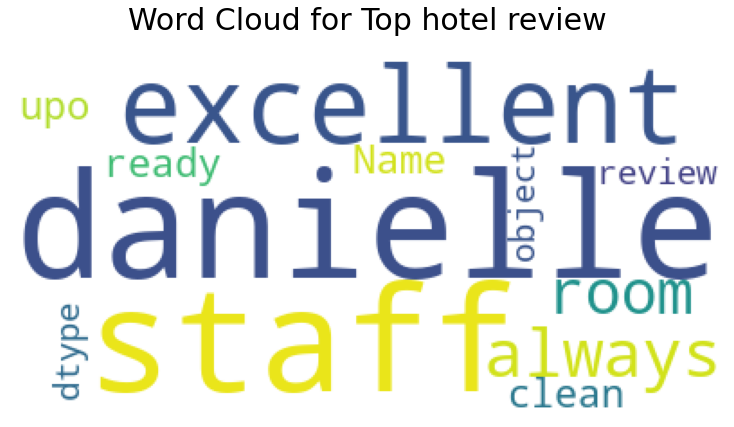

In [92]:
top_hotel = data[data['name']=="Hampton Inn Suites Red Bluff"]
word__cloud(top_hotel['clean.review'],'Word Cloud for Top hotel review')



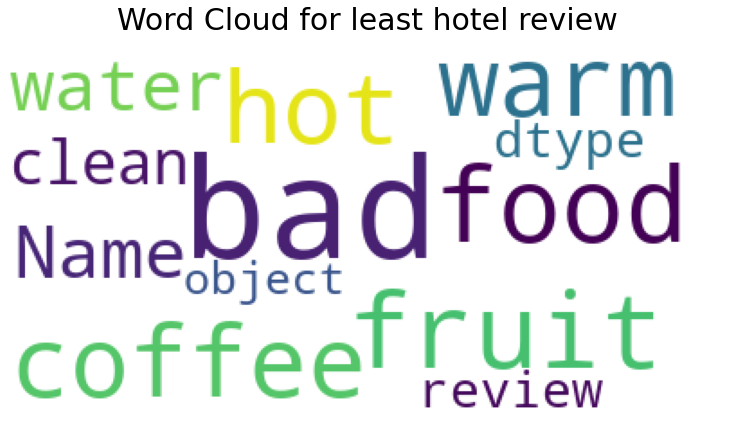

In [93]:
neg_hotel = data[data['name']=="Best Western Logan Inn"]
word__cloud(neg_hotel['clean.review'],'Word Cloud for least hotel review')



In [94]:
#prediction of real time data
#fetching data
get_data={'real_review':['staff was polite', 'food was tasty', 'bedsheets were not clean','no fresh fruits','excellent room interior','hotel was not good']}
real_data=pd.DataFrame(get_data)


#prediction
realdata_tok=token_lstm.texts_to_sequences(real_data['real_review'].values)
realdata_pad=pad_sequences(realdata_tok)
real_data['real_pred'] = model.predict(realdata_pad)

#result
real_data['result']=real_data['real_pred'].apply(lambda x:'Negative' if x<0.5 else 'Positive')

real_data

1/1 [==============================] - 0s 446ms/step


real_review  real_pred    result
0          staff was polite   0.560000  Positive
1            food was tasty   0.916143  Positive
2  bedsheets were not clean   0.466746  Negative
3           no fresh fruits   0.428550  Negative
4   excellent room interior   0.626402  Positive
5        hotel was not good   0.327124  Negative

In [540]:
import plotly.express as px

year_order = np.sort(data.year.unique())
fig = px.histogram(
    analysis1, x = analysis1['name'],
    category_orders = {"year": year_order},
    color = analysis1['year'], barmode = "group")
fig.show()

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_638/2046569953.py:7: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_638/2046569953.py:8: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/var/folders/lb/xf4hfmbj0ws5jqjdx9gs2k7m0000gn/T/ipykernel_638/2046569953.py:9: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



<Figure size 720x144 with 0 Axes>

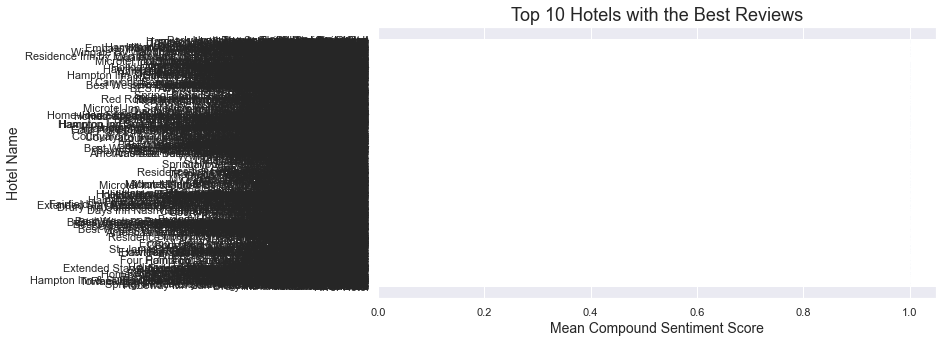

<Figure size 720x144 with 0 Axes>

In [542]:
pos_review = data[data['pred']==1]
top_pos_com = pos_review[['name','pred_ans']].groupby(['name']).mean().sort_values('pred_ans',ascending = True).tail(20).reset_index() 
# top_pos_com

plt.figure(figsize = (10,5))
plt.barh(ana1['name'],ana1['pred_ans'])
plt.title('Top 10 Hotels with the Best Reviews',fontSize = 18)
plt.ylabel('Hotel Name',fontSize = 14)
plt.xlabel('Mean Compound Sentiment Score',fontSize = 14)
plt.figure(figsize = (10,2))